In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
file_name = 'chest_xray'
PATH='/content/drive/My Drive/Datasets/' + file_name
class_1 = 'PNEUMONIA'
class_2 = 'NORMAL'

train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

train_class1_dir = os.path.join(train_dir, class_1)  
train_class2_dir = os.path.join(train_dir, class_2)  

val_class1_dir = os.path.join(val_dir, class_1)  
val_class2_dir = os.path.join(val_dir, class_2)  

test_class1_dir = os.path.join(test_dir, class_1)  
test_class2_dir = os.path.join(test_dir, class_2) 

In [24]:
num_class1_tr = len(os.listdir(train_class1_dir))
num_class2_tr = len(os.listdir(train_class2_dir))

num_class1_val = len(os.listdir(val_class1_dir))
num_class2_val = len(os.listdir(val_class2_dir))

num_class1_test = len(os.listdir(test_class1_dir))
num_class2_test = len(os.listdir(test_class2_dir))

total_train = num_class1_tr + num_class2_tr
total_val = num_class1_val + num_class2_val
total_test = num_class1_test + num_class2_test

print('total training ' + class_1 + ' images:', num_class1_tr)
print('total training ' + class_2 + ' images:', num_class2_tr)

print('total validation ' + class_1 + ' images:', num_class1_val)
print('total validation ' + class_2 + ' images:', num_class2_val)

print('total test ' + class_1 + ' images:', num_class1_val)
print('total test ' + class_2 + ' images:', num_class2_val)

print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)

total training PNEUMONIA images: 3895
total training NORMAL images: 1353
total validation PNEUMONIA images: 9
total validation NORMAL images: 8
total test PNEUMONIA images: 9
total test NORMAL images: 8
--
Total training images: 5248
Total validation images: 17
Total test images: 627


In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
val_image_generator = ImageDataGenerator(rescale=1./255) 
test_image_generator = ImageDataGenerator(rescale=1./255)

In [50]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=val_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=total_test,
                                                         directory=test_dir,
                                                         target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                         class_mode='binary')


Found 5248 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 627 images belonging to 2 classes.


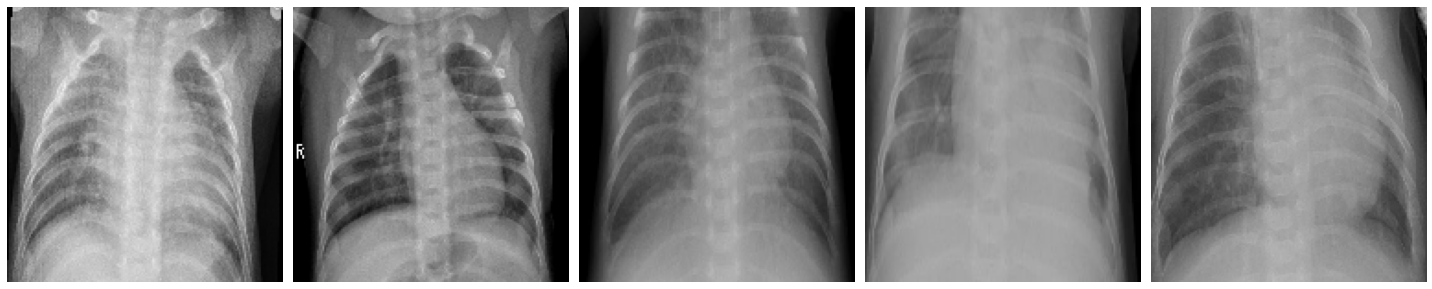

In [51]:
test_data_X, test_data_Y = next(test_data_gen)
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

In [34]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [42]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=np.ceil(total_train / batch_size).astype(int),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=np.ceil(total_val / batch_size).astype(int)
)

Epoch 1/15
41/41 [==============================] - 77s 2s/step - loss: 0.0855 - accuracy: 0.9684 - val_loss: 0.2784 - val_accuracy: 0.8750
Epoch 2/15
41/41 [==============================] - 76s 2s/step - loss: 0.0675 - accuracy: 0.9748 - val_loss: 0.2569 - val_accuracy: 0.9375
Epoch 3/15
41/41 [==============================] - 76s 2s/step - loss: 0.0659 - accuracy: 0.9762 - val_loss: 0.9374 - val_accuracy: 0.6250
Epoch 4/15
41/41 [==============================] - 77s 2s/step - loss: 0.0590 - accuracy: 0.9783 - val_loss: 0.4104 - val_accuracy: 0.8125
Epoch 5/15
41/41 [==============================] - 75s 2s/step - loss: 0.0427 - accuracy: 0.9840 - val_loss: 0.1710 - val_accuracy: 1.0000
Epoch 6/15
41/41 [==============================] - 76s 2s/step - loss: 0.0400 - accuracy: 0.9840 - val_loss: 0.3781 - val_accuracy: 0.8125
Epoch 7/15
41/41 [==============================] - 76s 2s/step - loss: 0.0271 - accuracy: 0.9899 - val_loss: 0.1874 - val_accuracy: 0.8750
Epoch 8/15
41/41 [==

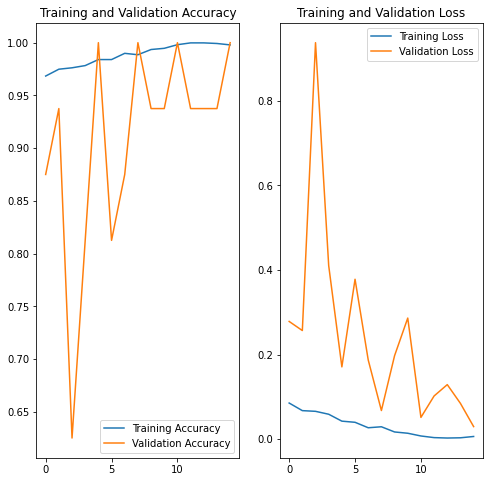

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
# print(test_data_Y)
loss, accuracy = model.evaluate(x = test_data_X, y = test_data_Y)

20/20 [==============================] - 0s 18ms/step - loss: 2.1186 - accuracy: 0.7719
